**EP ECON**

Ao longo desse trabalho serão apresentados gráficos e no final uma simulação, os gráficos podem são fornecer interação, sinta-se a vontade para exportar, mexer nos eixos, esconder curvas etc.

In [21]:
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from plotly.graph_objs import Scatter, Layout, Marker
import plotly.graph_objs as go
import random


def oferta_demanda():

    # construir parametrizacao random e printar ela descrita
    # varia de 0 a 10
    gostos = []
    for i in range(3):
        gostos.append(random.randint(0,10))
    gostos = sorted(gostos)
    expectativa = 6

    traces = []
    for b in [0.5, 8]:
        for index, gosto in enumerate(gostos):
            delta = (gosto + expectativa)/20.0
            if b == 8:
                delta = -1*delta
            axis_x = []
            axis_y = []
            for x in range(10):
                axis_x.append(x)
                axis_y.append(b + float(delta*x))

            trace = go.Scatter(
                x=axis_x,
                y=axis_y,
                name = 'Oferta_'+str(index) if b==8 else 'Demanda_'+str(index)
            )
            traces.append(trace)

    fig = {
        "data": [trace for trace in traces],
        "layout": Layout(title="CURVA OFERTA & DEMANDA" )
    }


    iplot(fig)

oferta_demanda()




Aqui plotei 3 gráficos de oferta e demanda, cada qual dos três com "gostos" distintos. 
No gráfico de oferta e demanda podemos verificar algumas coisas. Aqui fiz apenas a variação na variável "gosto", de modo que, é simples perceber que para "gostos maiores" ou seja produstos mais desejados o preço mesmo aumentando temos uma demanda que acaba não variando muito. Também é possível notar que o preço de equilibrio é menor para produtos com gosto mais elevado (interseção Demanda/Oferta 2), enquanto a curva 0, menor gosto possível o ponto de equilibrio nem é alcançado.

**Elasticidade**

Aqui apresento três representações mais conhecidas de elasticidade, todas geradas de modo orgânico.

In [22]:
def elasticidade():

    elasticidade = ['simples', 'perfeita_inelastica', 'perfeita_elastica']
    for ele in elasticidade:
        axis_x = []
        traces = []
        axis_y = []

        # calc a simple demand curve
        for x in range(10):
            if ele == 'perfeita_inelastica':
                axis_x.append(7)
            elif ele == 'perfeita_elastica':
                axis_x.append(x*1000)
            else:
                axis_x.append(x)
            axis_y.append(8 - float(2*x))

        trace = go.Scatter(
            x=axis_x,
            y=axis_y
        )
        traces.append(trace)

        # calc a elasticity curve
        new_axis_y = []
        new_axis_x = []
        for x in range(9):
            if x % 2 == 1:
                continue
            new_axis_x.append(x)
            elasticity = float(((axis_x[x] - axis_x[x+1])/ (axis_x[x]+axis_x[x+1])/2.0)) \
                / float(((axis_y[x] - axis_y[x+1])/ (axis_y[x] + axis_x[x+1]/2.0)))

            new_axis_y.append(elasticity)

        trace = go.Scatter(
            x=new_axis_x,
            y=new_axis_y

        )
        traces.append(trace)
        fig = {
            "data": [trace for trace in traces],
            "layout": Layout(title="CURVA "+ele.upper() )
        }


        iplot(fig)
elasticidade()


**PIB Real & Nominal**

Aqui reproduzi em uma econômia muito simples, de um produto uma breve análise da influência da variação de preços e a quantidade gerada do mesmo.

In [23]:
def pib():
    anos_dinheiro = {
        2000 : 100,
        2001 : 110,
        2002 : 90,
        2003 : 105,
        2004 : 120,
    }
    anos_preco = {
        2000 : 0.55,
        2001 : 0.6,
        2002 : 0.7,
        2003 : 0.45,
        2004 : 0.8,
    }
    traces = []

    for tipo in ['preco_unit (* 100)', 'nominal', 'real']:
        axis_y = []
        axis_x = []
        for ano in anos_dinheiro:
            if tipo == 'nominal':
                axis_x.append(ano)
                axis_y.append(anos_dinheiro[ano])
            if tipo == 'preco_unit (* 100)':
                axis_x.append(ano)
                axis_y.append(anos_preco[ano]*100)
            if tipo =='real':
                axis_x.append(ano)
                axis_y.append(anos_dinheiro[ano]/anos_preco[ano] \
                    * anos_preco[2000])

        trace = go.Scatter(
            x=axis_x,
            y=axis_y,
            name = tipo
        )
        traces.append(trace)

    fig = {
        "data": [trace for trace in traces],
        "layout": Layout(title="CURVA PIB" )
    }

    iplot(fig)

pib()

In [24]:
def inflacao():
    anos_dinheiro = {
        2000 : [100, 100],
        2001 : [150, 180],
        2002 : [155, 182],
        2003 : [165, 190],
        2004 : [166, 193],
    }
    percent = [0.6, 0.4]
    traces = []

    axis_y = []
    axis_x = []
    base = anos_dinheiro[2000][0] * percent[0] + anos_dinheiro[2000][1] * percent[1]
    for ano in anos_dinheiro:
        axis_x.append(ano)
        tot = anos_dinheiro[ano][0]*percent[0] + anos_dinheiro[ano][1]*percent[1]
        axis_y.append((tot - base))
    traces = []
    trace = go.Scatter(
        x=axis_x,
        y=axis_y,
        name = 'Inflacao em %'
    )
    traces.append(trace)
    axis_y1 = []
    axis_y2 = []
    for ano in anos_dinheiro:
        axis_y1.append(anos_dinheiro[ano][0])
        axis_y2.append(anos_dinheiro[ano][1])

    for index, y in enumerate([axis_y1, axis_y2]):
        trace = go.Scatter(
            x=axis_x,
            y=y,
            name = 'Produto_'+str(index)
        )
        traces.append(trace)


    fig = {
        "data": [trace for trace in traces],
        "layout": Layout(title="CURVA INFLACAO" )
    }

    iplot(fig)

inflacao()

**Simulção de trocas em uma pequena nação**

Vamos começar criando uma população, normal (hipótese não absurda da nossa realidade). Vamos estudar o índice gini e alteração de preços.

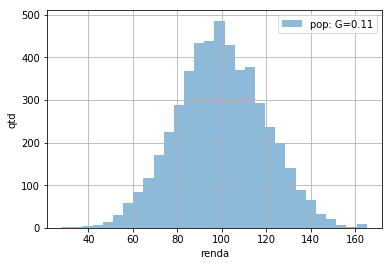

In [25]:
import random

# Tamanho da populacao e media 
N  = 5000 
MU = 100. 

population = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

def gini(y):
    " Calculo do indice gini para populacao y"
    y = sorted(y)
    n = len(y)
    numer = 2 * sum((i+1) * y[i] for i in range(n))
    denom = n * sum(y)
    return (numer / denom) - (n + 1) / n

%matplotlib inline
import matplotlib.pyplot as plt

def hist(population, label='pop', **kwargs):
    "Histograma para uma populacao"
    label = label + ': G=' + str(round(gini(population), 2))
    h = plt.hist(list(population), bins=30, alpha=0.5, label=label, **kwargs)
    plt.xlabel('renda'); plt.ylabel('qtd'); plt.grid(True)
    plt.legend()
hist(population)


**Transações**

Vamos definir uma transação de modo bem simples como sendo um jogo, onde os dois atores colocam o dinheiro no pote
e então o valor total é divido randomicamente entre eles.

In [26]:
def random_split(A, B):
    " Pega todo o dinheiro, insere em um pote e divide randomicamente entre os atores "
    pot = A + B
    share = random.uniform(0, pot)
    return share, pot - share
random_split(100, 100)


(8.411810638749895, 191.5881893612501)

**Iterações**

Definimos como os atores iteragem, de maneira simples, pegamos dois atores da população e fazemos eles transacionar suas rendas.


In [27]:
def anyone(N): return random.sample(range(N), 2)

**Simulação**

A função simulação pega uma população inicial, chama  dois atore para interagirem e transacionarem.

In [28]:
def simulate(population, T, transaction=random_split, interaction=anyone):
    " Roda uma simulacao sobre uma populacao para T transacoes "

    population = population.copy()
    yield population
    for t in range(1, T + 1):
        i, j = interaction(len(population))
        population[i], population[j] = transaction(population[i], population[j]) 
        yield population

Exemplo:

In [29]:
for pop in simulate([100] * 4, 8):
    print(pop)

[100, 100, 100, 100]
[100.10652060235242, 100, 99.89347939764758, 100]
[100.10652060235242, 100, 162.7010485101893, 37.192430887458265]
[100.10652060235242, 84.46749448244904, 162.7010485101893, 52.72493640500924]
[100.10652060235242, 84.46749448244904, 204.40544319681155, 11.020541718386994]
[100.10652060235242, 80.98921199715849, 204.40544319681155, 14.498824203677543]
[60.23723895650154, 120.85849364300937, 204.40544319681155, 14.498824203677543]
[60.23723895650154, 218.36614856109594, 106.89778827872499, 14.498824203677543]
[60.23723895650154, 56.27047336620143, 268.9934634736195, 14.498824203677543]


In [30]:
import statistics

def show(population, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Run a simulation for k*N steps, printing statistics and displaying a plot and histogram."
    N = len(population)
    start = list(population)
    # Sort results so that percentiles work
    results = [(t, sorted(pop)) 
               for (t, pop) in enumerate(simulate(population, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in results]
    
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in results:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
            
    # Plot:
    plt.hold(True); plt.xlabel('renda'); plt.ylabel('iter'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in results]
        plt.plot(line, times)
    plt.show()
    
    # Histogram:
    R = (min(pop+start), max(pop+start))
    hist(start, 'inicio', range=R)
    hist(pop, 'fim', range=R)
    
    return pop
                
def percent(pct, items):
    "The item that is pct percent through the sorted list of items."
    return items[min(len(items)-1, len(items) * pct // 100)]

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  19.8   54   74   99  125  144
 20,000 0.49  95.6    1   11   72  227  440
 40,000 0.50  98.5    1   11   69  227  437
 60,000 0.50  99.6    1   11   67  232  443
 80,000 0.50 100.8    1   10   69  224  486
100,000 0.50 101.0    1   10   69  230  468
120,000 0.50 100.2    1   10   69  233  464
140,000 0.50  98.2    1   10   70  229  444
160,000 0.51 102.7    1   11   67  230  472
180,000 0.50  97.9    1   11   69  225  437
200,000 0.50  99.6    1   10   69  231  445


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

/opt/conda/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning:

axes.hold is deprecated, will be removed in 3.0



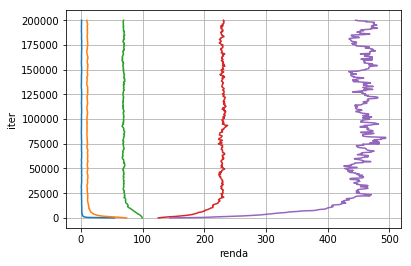

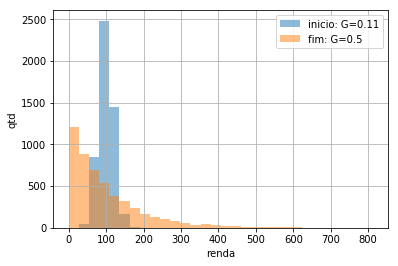

In [31]:
pop = show(population)


**Comentários da saída**

O print: Para a população inicial e cada 10.000 transações realizadas, mostramos o indíce Gini e o desvio padrão da população, e a renda para cada um dos 5 primeiros percentils da população (1%, 10%, 50%, 90% e 99%).

O primeiro gráfico: Eles nos aparesenta a mesma informação contida no print, a renda final dos indivíduos em cada percentil, porém com mais pontos no eixo. O azul mais a esquerda é a marcada de 1% e o roxo mais a direita 99%, as linhas representam os percentil em ordem crescente. É fácil verificar que rápidamente os 1% mais ricos (percentil 99%) enriquecem de maneira muito rápida e conforme aproxima-se da transação número 50.000 vai convergindo.

O histograma: Apresenta a população e sua riqueza inicial e final em forma de histograma. 

Os resultados estão mostrando que a desigualdade dentro dessa população está aumentando, indíce gini está crescendo, desvio padrão e os pobres ficando mais pobres e os ricos ficando muito ricos. Qual impacto disso sobre outros indicadores da nossa nação teste?

Inserir a MAO DO GOVERNO!!! Taxar os ricos e redistribuir a renda de volta na população.

**Taxações**

Vamos tentar melhorar a igualdade na nossa população atráves de políticas de taxações e redistribuição de renda. Vamos começar por taxar os 1% mais ricos e redistribuir essa renda para o resto da população de volta.

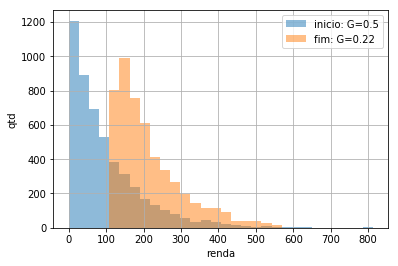

In [32]:
ini_pop = pop
for ite in range(100):
    richest =  sorted(pop)[4950:]
    tax = 0
    new_richest = []
    for actor in sorted(richest):
        new_richest.append(actor * 0.75)
        tax += actor * 0.25

    pop = pop[:4950] + new_richest

    new_pop = []
    for actor in pop:
        actor += tax/len(pop)
        new_pop.append(actor)
    pop = new_pop

R = (min(ini_pop+pop), max(ini_pop+pop))
hist(ini_pop, 'inicio', range=R)
hist(pop, 'fim', range=R)


**Resultados**

Podemos ver que ao aplicar taxações conseguimos melhorar muito nosso indíce Gini, acontece que embora a curva se desloque a direita o formato permance muito semelhante